In [9]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/dhc/groups/mp2024cl2/ukbiobank_filters/filter_predictions.csv"
# Load the CSV filei
data = pd.read_csv(csv_path)
threshold = 0.5

# Get the third column
positive_probs = data["pos_prob"]


# Divide the data into rows with values higher than 0.6 and lower
good = data[positive_probs > threshold]
bad = data[positive_probs <= threshold]

# Print the counts of each group
print("good", len(good))
print("bad", len(bad))


good 113474
bad 62328


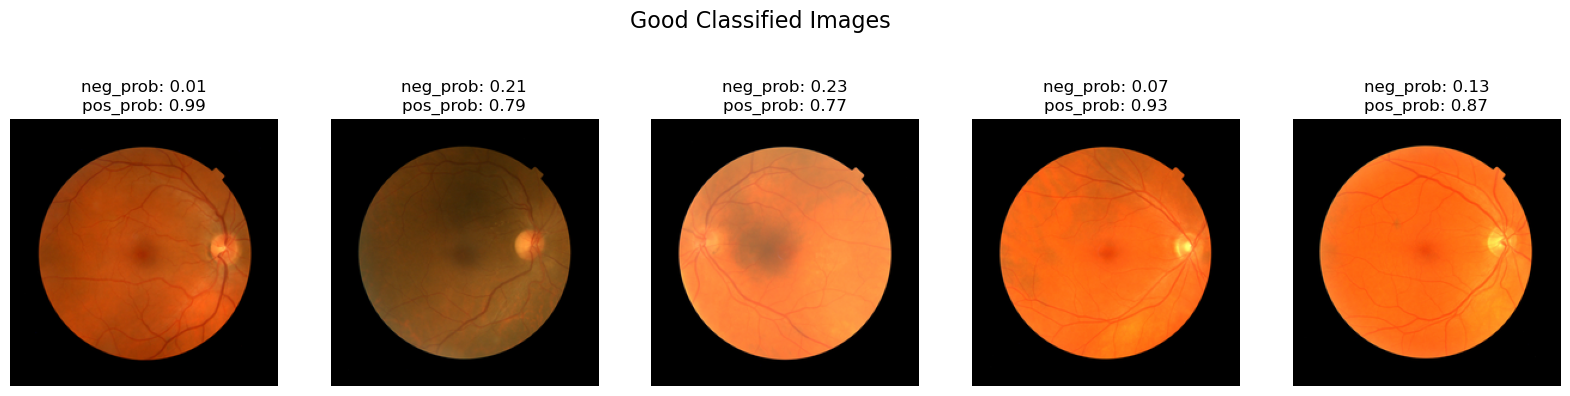

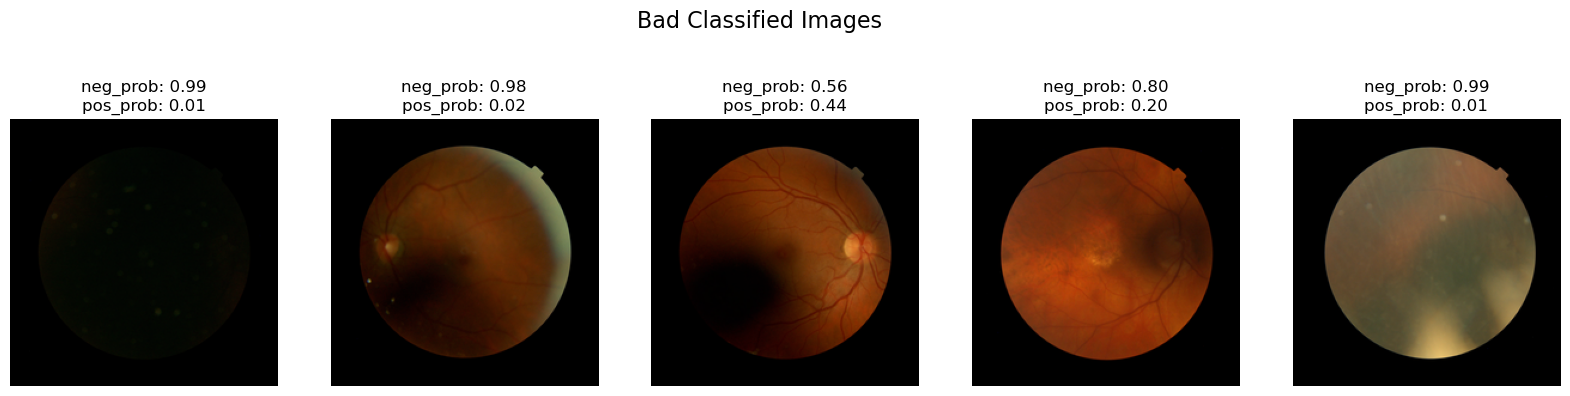

In [14]:
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display images with probabilities
def display_samples(df, title):
    samples = df.sample(5)
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    fig.suptitle(title, fontsize=16)
    for i, (index, row) in enumerate(samples.iterrows()):
        img = mpimg.imread(row['file_path'])
        axes[i].imshow(img)
        axes[i].set_title(f"neg_prob: {row['neg_prob']:.2f}\npos_prob: {row['pos_prob']:.2f}")
        axes[i].axis('off')
    plt.show()

# Display 5 random samples from good and bad classified images
display_samples(good, "Good Classified Images")
display_samples(bad, "Bad Classified Images")

## ROC Analysis

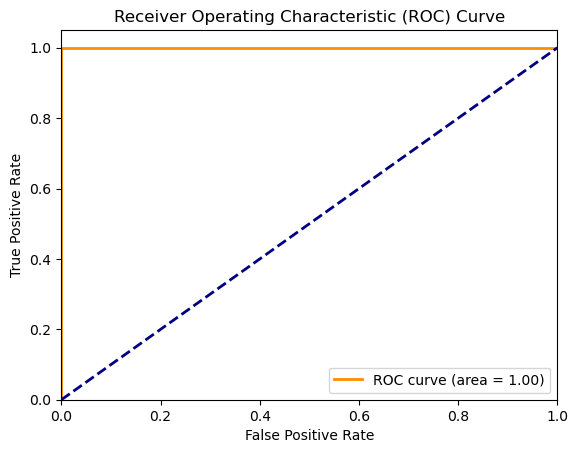

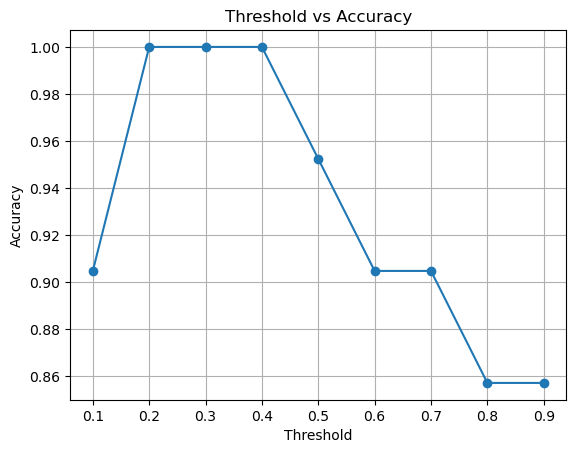

In [ ]:
from sklearn.metrics import roc_curve, auc

test_preds_path = "/dhc/home/hoangan.nguyen/mp-lippert-experiments/results/resnet_filter_experiment/2024-12-04_10#05#11/test_predictions.csv"
test_preds = pd.read_csv(test_preds_path)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(test_preds['label'], test_preds['pos_prob'])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Determine how many good images would be selected at different thresholds and pl
accuracies = []
thresholds = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for thresh in thresholds:
    preds = (test_preds['pos_prob'] >= thresh).astype(int)
    accuracy = (preds == test_preds['label'])
    accuracies.append(accuracy)

# Plot the accuracy vs threshold
plt.figure()
plt.plot(thresholds, accuracies, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.grid(True)
plt.show()

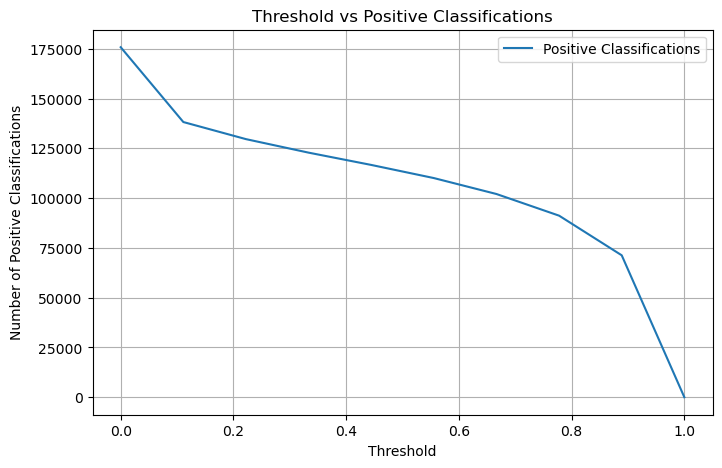

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Define thresholds
thresholds = np.linspace(0, 1, 10)

# Count positives for each threshold
positive_counts = [np.sum(positive_probs >= t) for t in thresholds]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, positive_counts, label='Positive Classifications')
plt.xlabel('Threshold')
plt.ylabel('Number of Positive Classifications')
plt.title('Threshold vs Positive Classifications')
plt.grid(True)
plt.legend()
plt.show()